### Data Preparation - The Legacy of Housing Segregation

In [1]:
! pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26817 sha256=020635093fba52b21c3c44da94dedea97ea284b694358d2bcf10d69d146ddede
  Stored in directory: /home/arcgis/.cache/pip/wheels/a6/64/11/62d5f7b88421a5d80068ac9937fe2915e497da3eba900c8f59
Successfully built pandasql


In [2]:
import os
import json
import shutil
import zipfile
from zipfile import ZipFile
import pandas as pd
import numpy as np
import arcgis
from arcgis.gis import GIS
from arcgis.mapping import WebMap, WebScene
from arcgis.features import FeatureLayer
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import arcpy 
from arcpy import env
from IPython.display import display
from IPython.display import Image
from IPython.core.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.transforms
from pandasql import PandaSQL
pdsql = PandaSQL()

In [3]:
# https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/
# gis = GIS() # Connect to ArcGIS Online as an anonymous user
gis = GIS("home")
print("Successfully logged in as: " + gis.properties.user.username)

Successfully logged in as: bnhilton


/opt/conda/lib/python3.6/site-packages/arcgis/gis/__init__.py:407: UserWarning: You are logged on as bnhilton with an administrator role, proceed with caution.
  self.users.me.username)


### 1 - Project Understanding - define problem to be solved

In response to the unstable housing market during the Great Depression, the U.S. Federal Housing Authority (FHA) created the Home Owners’ Loan Corporation (HOLC) which was tasked with creating residential security maps for cities across the country.  The creators of these maps assessed the security of neighborhoods within municipalities and assigned color-coded risk values to the neighborhoods.  The "best” neighborhoods were shaded in on HOLC maps in green, the second-best neighborhoods marked “still desirable” were shaded in on HOLC maps in blue, the neighborhoods that were perceived to be “definitely declining” by HOLC assessors were shaded in on HOLC maps in yellow, and the “hazardous” neighborhoods were shaded in on HOLC maps in red (Nelson, Robert K. et al. 2017).

The neighborhoods that were marked as “hazardous” and “definitely declining” by the HOLC assessors experienced a sharp increase in racial segregation in the decades following the production of the HOLC maps.  This phenomenon has been referred to as “redlining” because the areas marked “hazardous” on the 1930s maps that became the most racially segregated and economically vulnerable neighborhoods during the decades following the composition of the maps were outlined in red (Aaronson, Hartley, and Mazumder 2017).  The harmful disparate impact of redlining on members of racial and ethnic minority groups in the U.S. has been documented in a variety of areas including housing finance and credit access (Daniel, Hartley, Daniel A., and Mazumder, Bhashkar 2017), employment (Zenou and Boccard 2000), poverty (Ian and Jordan 2016), food deserts (Zhang and Ghosh 2016; Eisenhauer 2001), mass incarceration (Casey 2015), and environmental inequality (Hoffman, Shandas, and Pendleton 2020; Grove et al. 2018).

An emerging area of inquiry is the relationship between historical redlining in the U.S. and current economic and environmental inequalities.  Research projects in this area argue for the existence of a causal link between historical redlining (perpetuated by the HOLC maps) and environmental injustices, economic inequalities, and educational inequities including the disparate impact of air and water pollution on low income communities and communities of color (Grove, Morgan et al. 2017; McCord, Lindsay E. 2016; Ard, Kerry 2015).

These analyses have examined this relationship between redlining and environmental injustices and educational inequities in specific cities in the United States including Sacramento (Jesus 2009), Baltimore (Grove, Morgan et al. 2017), Portland (McCord, Lindsay E. 2016; Johnson, Katharine 2012), and Columbus (Johnson, Frank R. 2017).  This area of policy research can benefit from the increased usage of geospatial tools and analytic methodologies to examine the spatial and the statistical relationships between these variables.  Using these techniques, this study examines the relationship between historical redlining and modern pollution burden and population characteristics across eight cities in California that experienced the redlining polices of the 1930s.  In this manner, the story of redlining in California is through the use of geographic data.

This project poses questions such as: has the racial segregation and economic distress that was promulgated by the “red” and “yellow” security ratings on the 1930s HOLC maps affected the ways in which economically vulnerable communities in California experience environmental and population injustices today? How can geospatial technologies help policy-makers at the local, state, and federal levels of government better understand the second-order effects of historical redlining and try to remedy the negative effects in the current century? Initial exploratory analysis revealed, that in California, the redlined and yellow-lined areas of the state experience higher rates of poverty and unemployment, higher exposure to pollution, and lower levels of educational attainment than the blue and green-lined areas. Hence, the main question examined in this study is:

##### Did the “red” and “yellow” security ratings on the 1930s HOLC maps negatively impact the ways in which communities in California experience their environmental, health, and socio-economic, interactions today?

In [4]:
# Redlining Map - Los Angeles - September 30, 1939
Image(url= "https://agis.maps.arcgis.com/sharing/rest/content/items/14ee373411a74144a0fec981392d7192/data")

### 2 - Data Understanding - collect, extract, datasets; review attributes; perform visual assessment

#### Mapping Inequality - Redlining in New Deal America
Map: https://dsl.richmond.edu/panorama/redlining/#loc=5/39.1/-94.58

Introduction: https://dsl.richmond.edu/panorama/redlining/#loc=5/39.1/-94.58&text=intro

Downloads and Data: https://dsl.richmond.edu/panorama/redlining/#loc=5/39.1/-94.58&text=downloads

#### CalEnviroScreen 3.0
Main site: https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-30

Fact Sheet: https://oehha.ca.gov/media/downloads/calenviroscreen/fact-sheet/ces30factsheetfinal.pdf

CalEnviroScreen 3.0 Report: https://oehha.ca.gov/media/downloads/calenviroscreen/report/ces3report.pdf

CES3 Data: https://oehha.ca.gov/media/downloads/calenviroscreen/document/ces3gdb.zip

In [5]:
# Unzip zipped data from an uploaded file
# zip = ZipFile('/arcgis/home/test.zip')
# zip.extractall('/arcgis/home')

In [6]:
# https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/create-file-gdb.htm
# Create .gdb
# arcpy.CreateFileGDB_management('/arcgis/home', 'test')

In [7]:
# https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/delete.htm
# Delete .gdb
# gdb_to_delete = ('/arcgis/home/test.gdb')
# arcpy.Delete_management(gdb_to_delete)

In [8]:
# https://docs.python.org/3/library/os.html#os.mkdir
# Create a folder
# os.mkdir('/arcgis/home/test')

In [9]:
# https://docs.python.org/3/library/os.html#os.rmdir
# Delete a folder
# os.rmdir('/arcgis/home/test')

In [10]:
# List folder contents
# os.listdir('/arcgis/')

In [11]:
# Remove file
# os.remove('/arcgis/test.txt')

In [12]:
# Create a folder for this project
os.mkdir('/arcgis/home/holc')

In [13]:
# Create a folder for data storage
os.mkdir('/arcgis/home/holc/data')

In [65]:
# Create a folder for spatial data storage
os.mkdir('/arcgis/home/holc/spatial_data')

<Item title:"holc_data_ca_gdb" type:File Geodatabase owner:bnhilton>
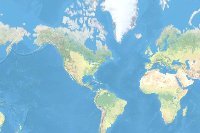

In [15]:
# Item Added From Toolbar
# Title: holc_data_gdb | Type: File Geodatabase | Owner: bnhilton
item = gis.content.get("2c4e5cd55c0747d3a65e6e5f86c5150d")
item

In [16]:
# Click on the holc_data_ca_gdb link above, download the holc_data_ca.gdb.zip file, and upload to the holc folder

In [17]:
# Unzip zipped data from an uploaded file
zip = ZipFile('/arcgis/home/holc/holc_data_ca.gdb.zip')
zip.extractall(path = '/arcgis/home/holc')

In [18]:
# Let's make sure we unzipped it into the correct folder
os.listdir('/arcgis/home/holc')

['data', 'spatial_data', 'holc_data_ca.gdb.zip', 'holc_data_ca.gdb']

In [6]:
# Let's set the path to the File Geodatabase and see what data it contains
holc_data_ca = env.workspace = ('/arcgis/home/holc/holc_data_ca.gdb')
list_features = arcpy.ListFeatureClasses()
list_features

['HOLC_Eight_California_Cities_v1',
 'CES_June_2018',
 'HOLC_Ozone_HS_HotSpots',
 'HOLC_Ozone_OptHS_HotSpots']

In [7]:
# Let's look at the data
HOLC_Eight_California_Cities = pd.DataFrame.spatial.from_featureclass(holc_data_ca + '/HOLC_Eight_California_Cities_v1')
HOLC_Eight_California_Cities.head()

,OBJECTID,HOLC_Grade,City,HOLC_Num,Polygon_ID,SHAPE
0,1,B,Stockton,2,1,"{""rings"": [[[-13504988.399, 4575989.745200001]..."
1,2,B,Stockton,2,2,"{""rings"": [[[-13506368.4685, 4574567.342399999..."
2,3,A,Stockton,1,3,"{""rings"": [[[-13504858.736, 4575555.872900002]..."
3,4,A,Stockton,1,4,"{""rings"": [[[-13503341.364500001, 4575675.8429..."
4,5,B,Stockton,2,5,"{""rings"": [[[-13503627.1151, 4574985.278999999..."


In [8]:
# Let's look at the data
CES_June_2018 = pd.DataFrame.spatial.from_featureclass(holc_data_ca + '/CES_June_2018')
CES_June_2018.head()

,OBJECTID,tract,pop2010,California_County,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,...,Hispanic_pct,White_pct,African_American_pct,Native_American_pct,Asian_American_pct,Other_pct,OBJECTID_1,CIdecile,CIvigintile,SHAPE
0,1,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59.0,...,57.5,31.3,1.9,0.5,7.2,1.6,3507,6.0,12.0,"{""rings"": [[[-13406868.807599999, 4155534.1215..."
1,2,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65.0,...,74.0,17.4,1.4,0.2,5.5,1.6,2733,7.0,14.0,"{""rings"": [[[-13406868.807599999, 4155534.1215..."
2,3,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45.0,...,52.2,40.9,0.8,0.5,2.9,2.6,4689,5.0,9.0,"{""rings"": [[[-13404825.2041, 4156508.351400003..."
3,4,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2.0,...,20.0,71.9,1.0,0.6,4.0,2.6,7864,1.0,1.0,"{""rings"": [[[-13403842.2522, 4147464.083899997..."
4,5,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3.0,...,25.7,65.4,1.5,0.8,3.5,3.2,7863,1.0,1.0,"{""rings"": [[[-13406429.874200001, 4147490.6802..."


#### Tabulate Intersection
https://pro.arcgis.com/en/pro-app/latest/tool-reference/analysis/tabulate-intersection.htm

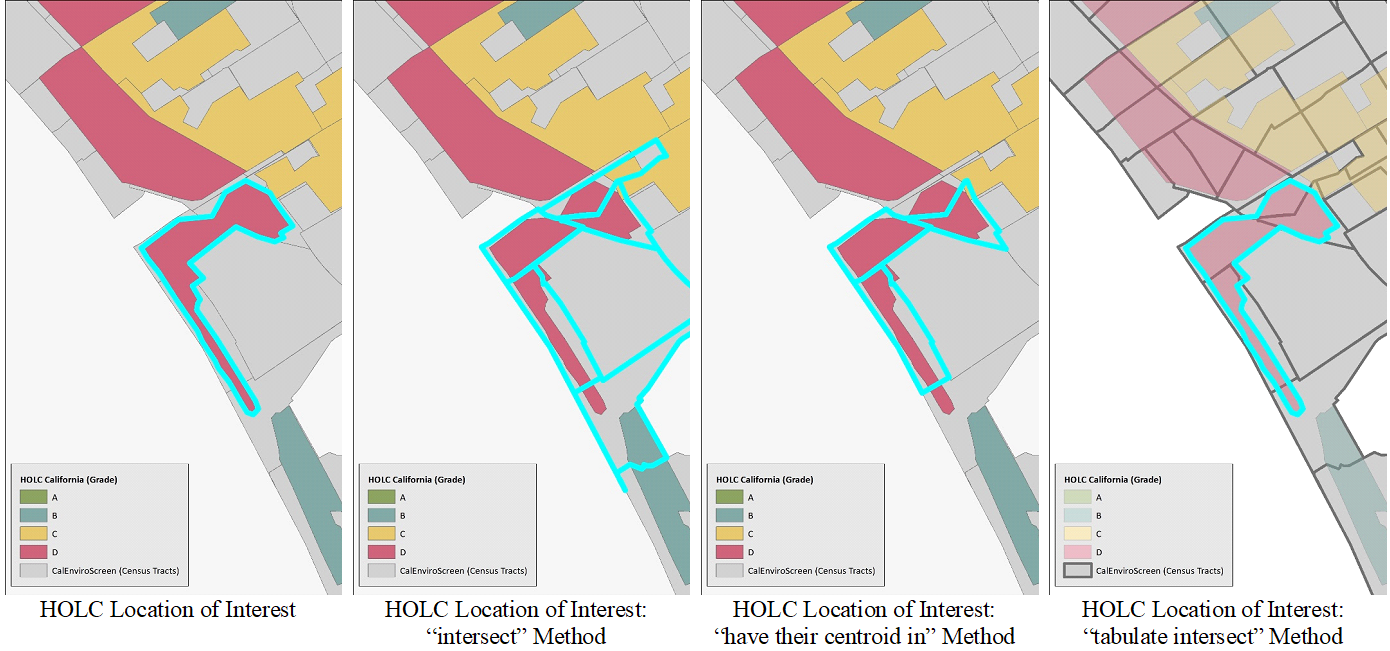

There are many methods for reapportioning data into new areal units so that data may be analyzed. Both the “intersect” and “have their centroid in” methods may over-aggregate / under-aggregate values as those methods do not take area into account when summarizing attribute values. The “tabulate intersect” method utilized in this study is an area‐weighting approach, one that allocates source area attributes (CES3 data) proportionately to target areas (HOLC areas) based on the area of their intersection (Goodchild and Siu-Ngan Lam 1980; Lam 1983; Comber and Zeng 2019). Hence, the “tabulate intersect” method is a suitable solution for this type of aggregation and analysis and compares favorably to similar techniques such as the pycnophylactic and dasymetric techniques (Comber and Zeng 2019). The disadvantage of this technique is it assumes that the data is homogeneous, that is, evenly distributed across the area, an assumption that is rarely true in the real world (Goodchild and Siu-Ngan Lam 1980).

When using these techniques, we also need to consider whether the data attributes are extensive or intensive, and given that, how best to aggregate the attributes of the two areas. If the attribute data is a spatially extensive variable (area totals), e.g., population counts, or total income, then summing the data is the proper technique to aggregate the attributes of the two areas. However, if the data is a spatially intensive variable (area averages), e.g., population density, or average income, then an area‐weighting approach would be the proper technique (Kyriakidis 2017; Scheider and Huisjes 2019; She, Duque, and Ye 2017).

In [22]:
# TabulateIntersection_analysis (in_zone_features, zone_fields, in_class_features, 
# out_table, {class_fields}, {sum_fields}, {xy_tolerance}, {out_units})
arcpy.TabulateIntersection_analysis(holc_data_ca + '/HOLC_Eight_California_Cities_v1', 'Polygon_ID', 
                                    holc_data_ca + '/CES_June_2018', 
                                    holc_data_ca + r'/HOLC_Eight_California_Cities_TabulateIntersection', 
                                    ('ozone', 'pm', 'diesel', 'drink', 'pest', 'RSEIhaz', 'traffic', 
                                     'cleanups', 'gwthreats', 'haz', 'iwb', 'swis', 'asthma', 'cvd', 
                                     'lbw', 'edu', 'housingB', 'ling', 'pov', 'unemp'))

<Result '/arcgis/home/holc/holc_data_ca.gdb/HOLC_Eight_California_Cities_TabulateIntersection'>

In [23]:
# TableToTable_conversion (in_rows, out_path, out_name, {where_clause}, {field_mapping}, {config_keyword})
arcpy.TableToTable_conversion(holc_data_ca + '/HOLC_Eight_California_Cities_TabulateIntersection', 
                              '/arcgis/home/holc/data', 'HOLC_Eight_California_Cities_TabulateIntersection.csv')

<Result '/arcgis/home/holc/data/HOLC_Eight_California_Cities_TabulateIntersection.csv'>

In [9]:
pd.set_option('max_columns', None)
# pd.set_option("max_rows", None)
df = pd.read_csv('/arcgis/home/holc/data/HOLC_Eight_California_Cities_TabulateIntersection.csv')
df

,OBJECTID,Polygon_ID,ozone,pm,diesel,drink,pest,RSEIhaz,traffic,cleanups,gwthreats,haz,iwb,swis,asthma,cvd,lbw,edu,housingB,ling,pov,unemp,AREA,PERCENTAGE
0,1,1,0.046,13.44,18.46,278.76,0.000,470.48,1111.17,0.00,0.00,0.01,18,0.00,69.05,9.15,5.89,22.3,14.0,7.9,46.7,13.9,6.804514e+05,32.278242
1,2,1,0.046,13.44,18.46,278.76,0.000,490.47,753.25,0.20,53.25,0.12,18,0.00,52.85,7.07,5.41,5.3,11.0,2.8,33.6,10.0,2.940620e+04,1.394928
2,3,1,0.046,13.44,18.46,278.76,0.000,545.82,1954.98,0.70,7.00,0.02,19,0.00,68.50,8.87,5.73,24.1,18.7,2.1,44.5,15.4,1.396360e+06,66.238430
3,4,2,0.046,13.44,18.46,278.76,0.000,490.47,753.25,0.20,53.25,0.12,18,0.00,52.85,7.07,5.41,5.3,11.0,2.8,33.6,10.0,3.003002e+03,0.480944
4,5,2,0.046,13.44,18.46,278.76,0.000,545.82,1954.98,0.70,7.00,0.02,19,0.00,68.50,8.87,5.73,24.1,18.7,2.1,44.5,15.4,6.199804e+05,99.292670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4751,4752,863,0.065,15.40,47.94,681.20,683.811,25476.58,170.75,12.10,3.00,0.01,0,4.25,142.28,14.96,9.24,53.8,21.1,27.1,77.5,21.8,1.978798e+06,92.886327
4752,4753,863,0.065,15.40,48.52,681.20,2.750,18551.96,909.14,80.50,45.75,0.80,0,21.75,131.64,14.13,7.44,53.3,26.0,16.2,76.3,17.6,1.113007e+05,5.224544
4753,4754,863,0.065,15.40,53.07,681.20,26.778,35783.10,434.57,23.50,24.00,0.01,0,1.00,142.28,14.96,8.12,28.2,32.0,15.5,78.7,11.5,2.390618e+04,1.122175
4754,4755,863,0.065,15.40,54.36,681.20,114.960,125383.89,815.36,15.95,13.50,0.76,0,0.50,107.80,14.75,4.79,52.5,23.2,13.7,83.4,23.5,2.442857e+03,0.114670


In [10]:
pd.set_option('max_columns', None)
# pd.set_option("max_rows", None)
df_sql = pdsql('SELECT *, (PERCENTAGE/100) as PERCENTAGE1 FROM df;')
df_sql

,OBJECTID,Polygon_ID,ozone,pm,diesel,drink,pest,RSEIhaz,traffic,cleanups,gwthreats,haz,iwb,swis,asthma,cvd,lbw,edu,housingB,ling,pov,unemp,AREA,PERCENTAGE,PERCENTAGE1
0,1,1,0.046,13.44,18.46,278.76,0.000,470.48,1111.17,0.00,0.00,0.01,18,0.00,69.05,9.15,5.89,22.3,14.0,7.9,46.7,13.9,6.804514e+05,32.278242,0.322782
1,2,1,0.046,13.44,18.46,278.76,0.000,490.47,753.25,0.20,53.25,0.12,18,0.00,52.85,7.07,5.41,5.3,11.0,2.8,33.6,10.0,2.940620e+04,1.394928,0.013949
2,3,1,0.046,13.44,18.46,278.76,0.000,545.82,1954.98,0.70,7.00,0.02,19,0.00,68.50,8.87,5.73,24.1,18.7,2.1,44.5,15.4,1.396360e+06,66.238430,0.662384
3,4,2,0.046,13.44,18.46,278.76,0.000,490.47,753.25,0.20,53.25,0.12,18,0.00,52.85,7.07,5.41,5.3,11.0,2.8,33.6,10.0,3.003002e+03,0.480944,0.004809
4,5,2,0.046,13.44,18.46,278.76,0.000,545.82,1954.98,0.70,7.00,0.02,19,0.00,68.50,8.87,5.73,24.1,18.7,2.1,44.5,15.4,6.199804e+05,99.292670,0.992927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4751,4752,863,0.065,15.40,47.94,681.20,683.811,25476.58,170.75,12.10,3.00,0.01,0,4.25,142.28,14.96,9.24,53.8,21.1,27.1,77.5,21.8,1.978798e+06,92.886327,0.928863
4752,4753,863,0.065,15.40,48.52,681.20,2.750,18551.96,909.14,80.50,45.75,0.80,0,21.75,131.64,14.13,7.44,53.3,26.0,16.2,76.3,17.6,1.113007e+05,5.224544,0.052245
4753,4754,863,0.065,15.40,53.07,681.20,26.778,35783.10,434.57,23.50,24.00,0.01,0,1.00,142.28,14.96,8.12,28.2,32.0,15.5,78.7,11.5,2.390618e+04,1.122175,0.011222
4754,4755,863,0.065,15.40,54.36,681.20,114.960,125383.89,815.36,15.95,13.50,0.76,0,0.50,107.80,14.75,4.79,52.5,23.2,13.7,83.4,23.5,2.442857e+03,0.114670,0.001147


In [11]:
pd.set_option('max_columns', None)
# pd.set_option("max_rows", None)
df_sql_2 = pdsql("SELECT Polygon_ID, SUM(PERCENTAGE1*ozone) as Ozone, \
SUM(PERCENTAGE1*pm) as PM_2_5, SUM(PERCENTAGE1*diesel) as Diesel_PM, \
SUM(PERCENTAGE1*drink) as Drinking_Water, SUM(PERCENTAGE1*pest) as Pesticide_Use, \
SUM(PERCENTAGE1*RSEIhaz) as Toxic_Releases, SUM(PERCENTAGE1*traffic) as Traffic, \
SUM(PERCENTAGE1*cleanups) as Cleanup_Sites, SUM(PERCENTAGE1*gwthreats) as Groundwater_Threats, \
SUM(PERCENTAGE1*haz) as Hazardous_Waste, SUM(PERCENTAGE1*iwb) as Impaired_Water_Body, \
SUM(PERCENTAGE1*swis) as Solid_Waste_Sites, SUM(PERCENTAGE1*asthma) as Asthma, \
SUM(PERCENTAGE1*cvd) as Cardiovascular_Disease, SUM(PERCENTAGE1*lbw) as Low_Birth_Weight, \
SUM(PERCENTAGE1*edu) as Educational_Attainment, SUM(PERCENTAGE1*housingB) as Housing_Burden, \
SUM(PERCENTAGE1*ling) as Linguistic_Isolation, SUM(PERCENTAGE1*pov) as Poverty, \
SUM(PERCENTAGE1*unemp) as Unemployment FROM df_sql GROUP BY Polygon_ID;")
df_sql_2

,Polygon_ID,Ozone,PM_2_5,Diesel_PM,Drinking_Water,Pesticide_Use,Toxic_Releases,Traffic,Cleanup_Sites,Groundwater_Threats,Hazardous_Waste,Impaired_Water_Body,Solid_Waste_Sites,Asthma,Cardiovascular_Disease,Low_Birth_Weight,Educational_Attainment,Housing_Burden,Linguistic_Isolation,Poverty,Unemployment
0,1,0.045959,13.428119,18.443681,278.513573,0.000000,520.246970,1664.121483,0.466459,5.379489,0.018149,18.646472,0.000000,68.398669,8.927429,5.772116,23.235441,17.058982,3.980046,45.018736,14.826887
1,2,0.045896,13.409574,18.418209,278.128928,0.000000,544.318141,1944.774559,0.696011,7.206590,0.020436,18.952177,0.000000,68.269658,8.841263,5.715489,23.955024,18.620633,2.098613,44.346836,15.339166
2,3,0.046000,13.440000,18.460000,278.760000,0.000000,490.470000,753.250000,0.200000,53.250000,0.120000,18.000000,0.000000,52.850000,7.070000,5.410000,5.300000,11.000000,2.800000,33.600000,10.000000
3,4,0.046000,13.440000,18.460000,278.760000,0.000000,490.470000,753.250000,0.200000,53.250000,0.120000,18.000000,0.000000,52.850000,7.070000,5.410000,5.300000,11.000000,2.800000,33.600000,10.000000
4,5,0.046000,13.440000,18.460000,278.760000,0.000000,490.470000,753.250000,0.200000,53.250000,0.120000,18.000000,0.000000,52.850000,7.070000,5.410000,5.300000,11.000000,2.800000,33.600000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0.062000,15.400000,38.010497,755.926835,0.290905,3703.426126,822.407441,6.420340,10.487144,0.307043,0.000000,5.041782,91.865263,8.888806,8.457998,42.062719,24.659137,19.248577,80.505879,21.470157
860,861,0.062859,15.407354,48.194015,681.525294,21.695537,27171.468542,567.704349,21.572259,26.747568,0.214547,0.000000,2.246852,138.969736,14.946594,9.280115,40.740739,36.629348,16.214562,84.331976,15.867333
861,862,0.064256,15.370733,46.367549,679.905395,63.806954,25796.702541,572.044963,38.707840,27.239883,0.277609,0.000000,8.419477,138.310066,14.680897,8.307639,40.183705,29.481260,16.506719,76.639196,14.501679
862,863,0.064872,15.369557,47.937280,679.853382,638.924623,25241.005150,212.803403,15.791558,5.507081,0.052069,0.000000,5.123078,141.403307,14.886822,9.109339,53.372846,21.398103,26.289591,77.319334,21.443842


In [12]:
HOLC_Eight_California_Cities_Final = pd.merge(HOLC_Eight_California_Cities, df_sql_2, on='Polygon_ID', how='inner')
HOLC_Eight_California_Cities_Final

,OBJECTID,HOLC_Grade,City,HOLC_Num,Polygon_ID,SHAPE,Ozone,PM_2_5,Diesel_PM,Drinking_Water,Pesticide_Use,Toxic_Releases,Traffic,Cleanup_Sites,Groundwater_Threats,Hazardous_Waste,Impaired_Water_Body,Solid_Waste_Sites,Asthma,Cardiovascular_Disease,Low_Birth_Weight,Educational_Attainment,Housing_Burden,Linguistic_Isolation,Poverty,Unemployment
0,1,B,Stockton,2,1,"{'rings': [[[-13504988.399, 4575989.745200001]...",0.045959,13.428119,18.443681,278.513573,0.000000,520.246970,1664.121483,0.466459,5.379489,0.018149,18.646472,0.000000,68.398669,8.927429,5.772116,23.235441,17.058982,3.980046,45.018736,14.826887
1,2,B,Stockton,2,2,"{'rings': [[[-13506368.4685, 4574567.342399999...",0.045896,13.409574,18.418209,278.128928,0.000000,544.318141,1944.774559,0.696011,7.206590,0.020436,18.952177,0.000000,68.269658,8.841263,5.715489,23.955024,18.620633,2.098613,44.346836,15.339166
2,3,A,Stockton,1,3,"{'rings': [[[-13504858.736, 4575555.872900002]...",0.046000,13.440000,18.460000,278.760000,0.000000,490.470000,753.250000,0.200000,53.250000,0.120000,18.000000,0.000000,52.850000,7.070000,5.410000,5.300000,11.000000,2.800000,33.600000,10.000000
3,4,A,Stockton,1,4,"{'rings': [[[-13503341.364500001, 4575675.8429...",0.046000,13.440000,18.460000,278.760000,0.000000,490.470000,753.250000,0.200000,53.250000,0.120000,18.000000,0.000000,52.850000,7.070000,5.410000,5.300000,11.000000,2.800000,33.600000,10.000000
4,5,B,Stockton,2,5,"{'rings': [[[-13503627.1151, 4574985.278999999...",0.046000,13.440000,18.460000,278.760000,0.000000,490.470000,753.250000,0.200000,53.250000,0.120000,18.000000,0.000000,52.850000,7.070000,5.410000,5.300000,11.000000,2.800000,33.600000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,D,Fresno,4,860,"{'rings': [[[-13337510.1405, 4403880.4868], [-...",0.062000,15.400000,38.010497,755.926835,0.290905,3703.426126,822.407441,6.420340,10.487144,0.307043,0.000000,5.041782,91.865263,8.888806,8.457998,42.062719,24.659137,19.248577,80.505879,21.470157
860,861,D,Fresno,4,861,"{'rings': [[[-13334615.241700001, 4400372.0372...",0.062859,15.407354,48.194015,681.525294,21.695537,27171.468542,567.704349,21.572259,26.747568,0.214547,0.000000,2.246852,138.969736,14.946594,9.280115,40.740739,36.629348,16.214562,84.331976,15.867333
861,862,C,Fresno,3,862,"{'rings': [[[-13334615.241700001, 4400372.0372...",0.064256,15.370733,46.367549,679.905395,63.806954,25796.702541,572.044963,38.707840,27.239883,0.277609,0.000000,8.419477,138.310066,14.680897,8.307639,40.183705,29.481260,16.506719,76.639196,14.501679
862,863,D,Fresno,4,863,"{'rings': [[[-13334810.1514, 4399331.8345], [-...",0.064872,15.369557,47.937280,679.853382,638.924623,25241.005150,212.803403,15.791558,5.507081,0.052069,0.000000,5.123078,141.403307,14.886822,9.109339,53.372846,21.398103,26.289591,77.319334,21.443842


In [13]:
df_for_corr = HOLC_Eight_California_Cities_Final[['Ozone','PM_2_5', 'Diesel_PM','Drinking_Water','Pesticide_Use',
                           'Toxic_Releases','Traffic','Cleanup_Sites','Groundwater_Threats',
                           'Hazardous_Waste','Impaired_Water_Body','Solid_Waste_Sites','Asthma',
                           'Cardiovascular_Disease','Low_Birth_Weight','Educational_Attainment',
                           'Housing_Burden', 'Linguistic_Isolation','Poverty','Unemployment','HOLC_Num']]

In [14]:
df_for_corr.dtypes

Ozone                     float64
PM_2_5                    float64
Diesel_PM                 float64
Drinking_Water            float64
Pesticide_Use             float64
Toxic_Releases            float64
Traffic                   float64
Cleanup_Sites             float64
Groundwater_Threats       float64
Hazardous_Waste           float64
Impaired_Water_Body       float64
Solid_Waste_Sites         float64
Asthma                    float64
Cardiovascular_Disease    float64
Low_Birth_Weight          float64
Educational_Attainment    float64
Housing_Burden            float64
Linguistic_Isolation      float64
Poverty                   float64
Unemployment              float64
HOLC_Num                    int64
dtype: object

In [15]:
df_for_corr.describe().T

,count,mean,std,min,25%,50%,75%,max
Ozone,864.0,0.042882,0.009085,0.018760,0.033660,0.045975,0.048112,0.065076
PM_2_5,864.0,10.894002,1.729123,5.440523,8.923531,11.205619,12.050000,15.430855
Diesel_PM,864.0,29.489729,17.144276,2.916804,18.944064,25.495691,36.635872,194.275913
Drinking_Water,864.0,398.966300,259.109376,44.149535,171.200000,329.752797,642.758339,1059.722662
Pesticide_Use,864.0,2.420786,23.726746,0.000000,0.000000,0.000000,0.000000,638.924623
Toxic_Releases,864.0,2724.373470,7656.084276,50.015693,304.038497,864.566064,3133.771887,125383.890000
Traffic,864.0,1090.065196,615.213604,51.382354,624.127165,970.295121,1392.530674,3629.157072
Cleanup_Sites,864.0,10.191187,15.649319,0.000000,0.846624,4.646245,13.528886,178.161341
Groundwater_Threats,864.0,22.496924,31.882823,0.000000,3.371348,11.485569,27.586909,287.620017
Hazardous_Waste,864.0,0.470058,0.954638,0.000000,0.042163,0.120000,0.381021,6.705186


In [16]:
# https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
df_for_corr.corr(method='pearson')

,Ozone,PM_2_5,Diesel_PM,Drinking_Water,Pesticide_Use,Toxic_Releases,Traffic,Cleanup_Sites,Groundwater_Threats,Hazardous_Waste,Impaired_Water_Body,Solid_Waste_Sites,Asthma,Cardiovascular_Disease,Low_Birth_Weight,Educational_Attainment,Housing_Burden,Linguistic_Isolation,Poverty,Unemployment,HOLC_Num
Ozone,1.000000,0.799109,-0.427338,0.732632,0.165281,0.305881,0.193060,-0.020187,-0.168137,-0.085312,-0.161497,0.113303,0.003232,0.355871,0.169065,0.253484,0.255834,0.165572,0.308002,0.325943,0.018598
PM_2_5,0.799109,1.000000,-0.269172,0.669674,0.190866,0.331664,0.245386,0.009108,-0.122078,0.033563,-0.054801,0.151755,0.123198,0.406879,0.277977,0.420137,0.391290,0.268701,0.456841,0.439608,0.090583
Diesel_PM,-0.427338,-0.269172,1.000000,-0.285197,0.037639,0.038449,-0.017685,0.090930,0.171961,0.089629,0.133961,-0.037608,0.092133,-0.072600,-0.019886,0.044852,0.038134,0.093637,0.048617,-0.077724,0.207425
Drinking_Water,0.732632,0.669674,-0.285197,1.000000,0.074101,0.213394,0.309510,-0.066392,-0.228309,-0.080035,-0.331723,0.106283,-0.242291,0.047288,0.107761,0.178650,0.236353,0.291047,0.132961,0.103626,-0.044739
Pesticide_Use,0.165281,0.190866,0.037639,0.074101,1.000000,0.355351,-0.060355,0.061065,0.004646,-0.001343,-0.011237,0.080225,0.154377,0.205099,0.114122,0.181947,0.046848,0.094661,0.175240,0.192032,0.093987
Toxic_Releases,0.305881,0.331664,0.038449,0.213394,0.355351,1.000000,-0.000655,0.059439,-0.052612,0.078468,-0.078962,0.049824,0.122450,0.287291,0.098215,0.287964,0.126281,0.133685,0.255876,0.241180,0.090820
Traffic,0.193060,0.245386,-0.017685,0.309510,-0.060355,-0.000655,1.000000,0.015752,-0.002733,0.029192,-0.050692,0.140207,-0.080623,0.000484,0.102079,0.082952,0.158269,0.161037,0.093089,0.036057,0.032078
Cleanup_Sites,-0.020187,0.009108,0.090930,-0.066392,0.061065,0.059439,0.015752,1.000000,0.627930,0.442886,0.298929,0.437165,0.255939,0.193023,0.085496,0.173384,0.093417,0.130557,0.203503,0.171919,0.285886
Groundwater_Threats,-0.168137,-0.122078,0.171961,-0.228309,0.004646,-0.052612,-0.002733,0.627930,1.000000,0.334683,0.366970,0.282692,0.298945,0.193265,0.018763,0.058142,0.048694,0.025975,0.145389,0.125744,0.227353
Hazardous_Waste,-0.085312,0.033563,0.089629,-0.080035,-0.001343,0.078468,0.029192,0.442886,0.334683,1.000000,0.184430,0.306583,0.084036,0.090700,0.024526,0.103853,0.042995,0.043151,0.116047,0.064307,0.207963


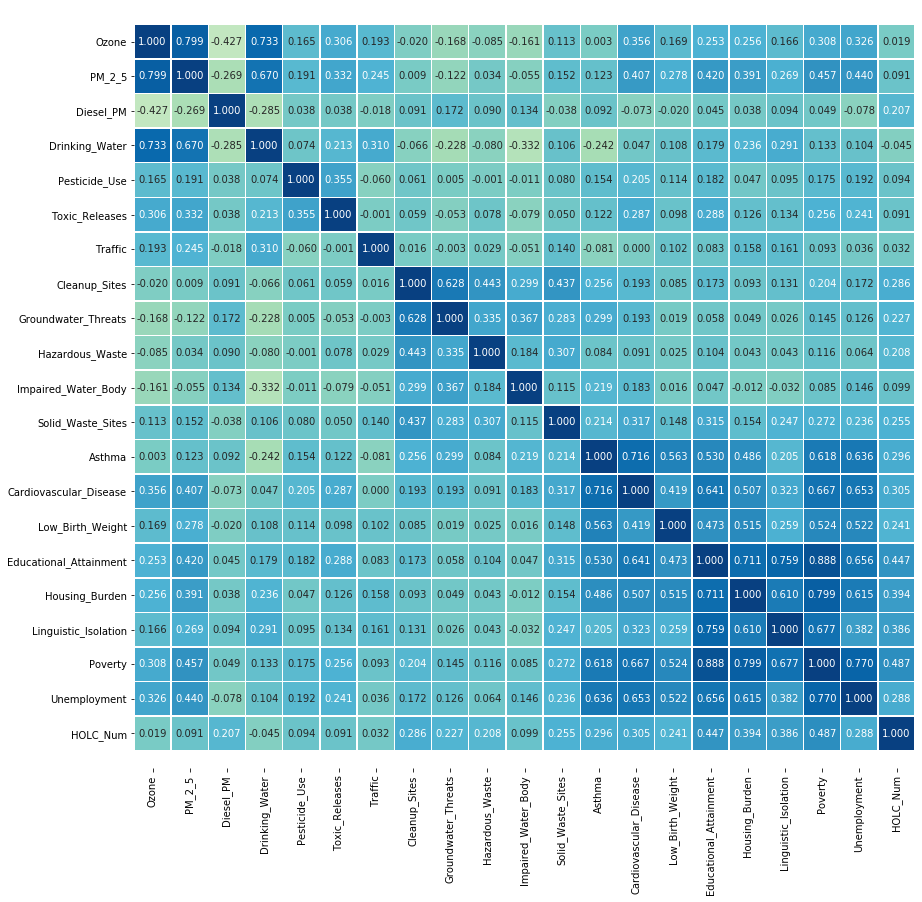

In [17]:
# https://matplotlib.org/3.1.0/tutorials/introductory/customizing.html
# http://seaborn.pydata.org/index.html
plt.rc('figure', figsize=(14,14))
corrMatrix = df_for_corr.corr()
ax = sns.heatmap(corrMatrix, annot=True, cmap="GnBu", linewidths=.5, cbar=False, center=0,fmt=".3f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

In [18]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
# Calculate p-values https://en.wikipedia.org/wiki/P-value
from scipy.stats.stats import pearsonr

In [19]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 3)
    return pvalues
    
rho = df_for_corr.corr()
pval = calculate_pvalues(df_for_corr)

r1 = rho.applymap(lambda x: '{:.3f}**'.format(x))
r2 = rho.applymap(lambda x: '{:.3f}*'.format(x))
r3 = rho.applymap(lambda x: '{:.3f}'.format(x))
r4 = rho.applymap(lambda x: '{:.3f}'.format(x))

rho = rho.mask(pval>0.1,r4)
rho = rho.mask(pval<=0.1,r3)
rho = rho.mask(pval<=0.05,r2)
rho = rho.mask(pval<=0.01,r1)
rho

,Ozone,PM_2_5,Diesel_PM,Drinking_Water,Pesticide_Use,Toxic_Releases,Traffic,Cleanup_Sites,Groundwater_Threats,Hazardous_Waste,Impaired_Water_Body,Solid_Waste_Sites,Asthma,Cardiovascular_Disease,Low_Birth_Weight,Educational_Attainment,Housing_Burden,Linguistic_Isolation,Poverty,Unemployment,HOLC_Num
Ozone,1.000**,0.799**,-0.427**,0.733**,0.165**,0.306**,0.193**,-0.020,-0.168**,-0.085*,-0.161**,0.113**,0.003,0.356**,0.169**,0.253**,0.256**,0.166**,0.308**,0.326**,0.019
PM_2_5,0.799**,1.000**,-0.269**,0.670**,0.191**,0.332**,0.245**,0.009,-0.122**,0.034,-0.055,0.152**,0.123**,0.407**,0.278**,0.420**,0.391**,0.269**,0.457**,0.440**,0.091**
Diesel_PM,-0.427**,-0.269**,1.000**,-0.285**,0.038,0.038,-0.018,0.091**,0.172**,0.090**,0.134**,-0.038,0.092**,-0.073*,-0.020,0.045,0.038,0.094**,0.049,-0.078*,0.207**
Drinking_Water,0.733**,0.670**,-0.285**,1.000**,0.074*,0.213**,0.310**,-0.066,-0.228**,-0.080*,-0.332**,0.106**,-0.242**,0.047,0.108**,0.179**,0.236**,0.291**,0.133**,0.104**,-0.045
Pesticide_Use,0.165**,0.191**,0.038,0.074*,1.000**,0.355**,-0.060,0.061,0.005,-0.001,-0.011,0.080*,0.154**,0.205**,0.114**,0.182**,0.047,0.095**,0.175**,0.192**,0.094**
Toxic_Releases,0.306**,0.332**,0.038,0.213**,0.355**,1.000**,-0.001,0.059,-0.053,0.078*,-0.079*,0.050,0.122**,0.287**,0.098**,0.288**,0.126**,0.134**,0.256**,0.241**,0.091**
Traffic,0.193**,0.245**,-0.018,0.310**,-0.060,-0.001,1.000**,0.016,-0.003,0.029,-0.051,0.140**,-0.081*,0.000,0.102**,0.083*,0.158**,0.161**,0.093**,0.036,0.032
Cleanup_Sites,-0.020,0.009,0.091**,-0.066,0.061,0.059,0.016,1.000**,0.628**,0.443**,0.299**,0.437**,0.256**,0.193**,0.085*,0.173**,0.093**,0.131**,0.204**,0.172**,0.286**
Groundwater_Threats,-0.168**,-0.122**,0.172**,-0.228**,0.005,-0.053,-0.003,0.628**,1.000**,0.335**,0.367**,0.283**,0.299**,0.193**,0.019,0.058,0.049,0.026,0.145**,0.126**,0.227**
Hazardous_Waste,-0.085*,0.034,0.090**,-0.080*,-0.001,0.078*,0.029,0.443**,0.335**,1.000**,0.184**,0.307**,0.084*,0.091**,0.025,0.104**,0.043,0.043,0.116**,0.064,0.208**


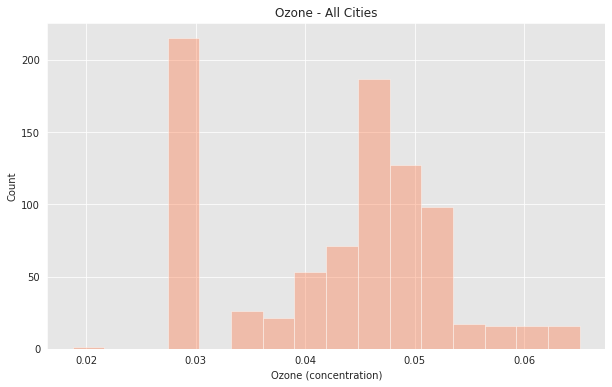

In [36]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Ozone'], color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Ozone (concentration)', ylabel='Count')
ax.set_title("Ozone - All Cities");

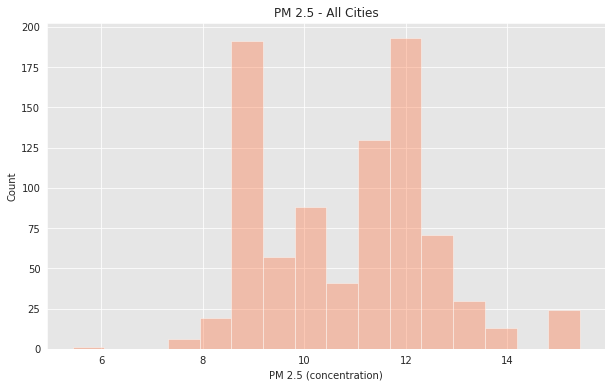

In [37]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['PM_2_5'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='PM 2.5 (concentration)', ylabel='Count')
ax.set_title("PM 2.5 - All Cities");

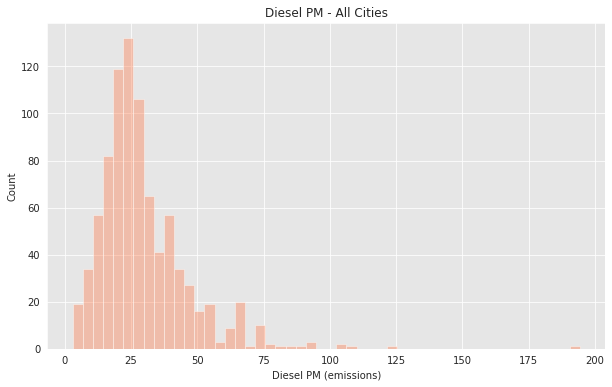

In [38]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Diesel_PM'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Diesel PM (emissions)', ylabel='Count')
ax.set_title("Diesel PM - All Cities");

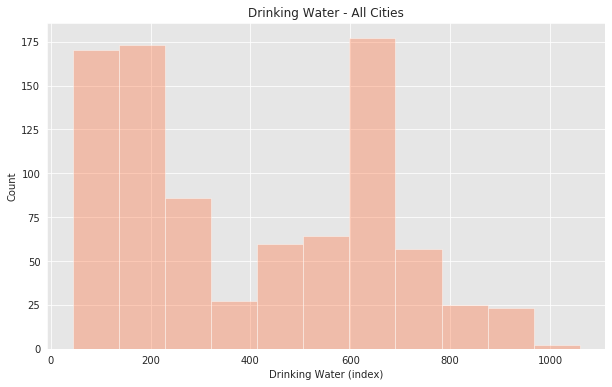

In [39]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Drinking_Water'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Drinking Water (index)', ylabel='Count')
ax.set_title("Drinking Water - All Cities");

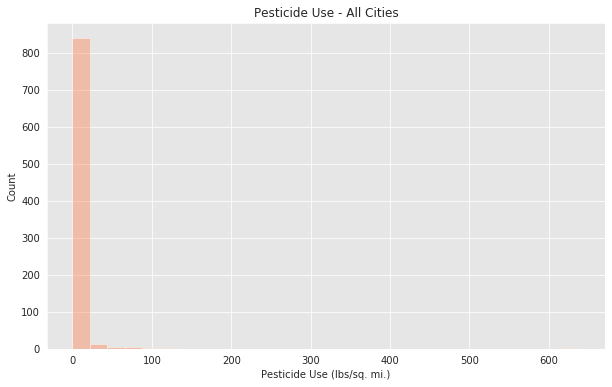

In [40]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Pesticide_Use'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Pesticide Use (lbs/sq. mi.)', ylabel='Count')
ax.set_title("Pesticide Use - All Cities");

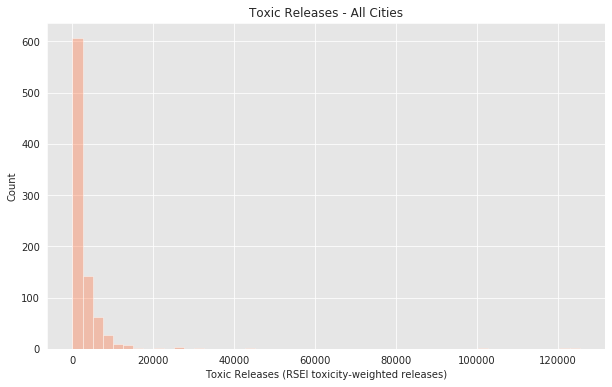

In [41]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Toxic_Releases'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Toxic Releases (RSEI toxicity-weighted releases)', ylabel='Count')
ax.set_title("Toxic Releases - All Cities");

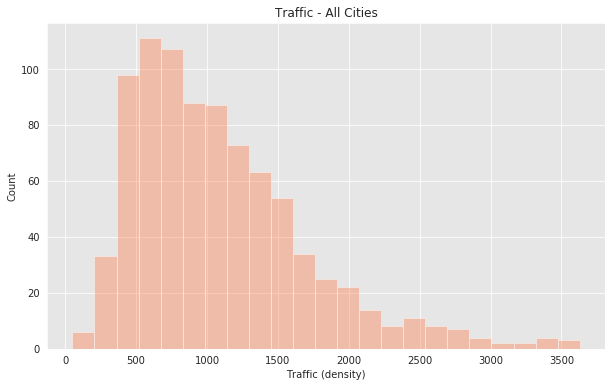

In [42]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Traffic'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Traffic (density)', ylabel='Count')
ax.set_title("Traffic - All Cities");

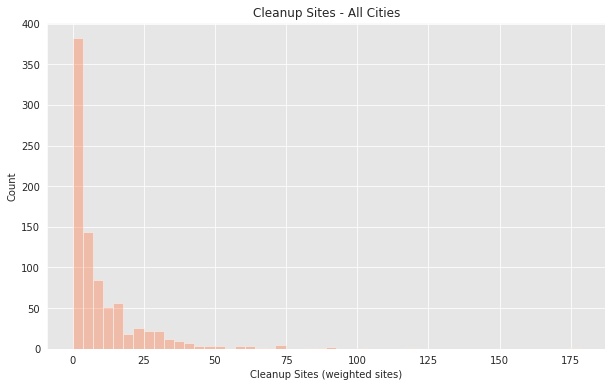

In [43]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Cleanup_Sites'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Cleanup Sites (weighted sites)', ylabel='Count')
ax.set_title("Cleanup Sites - All Cities");

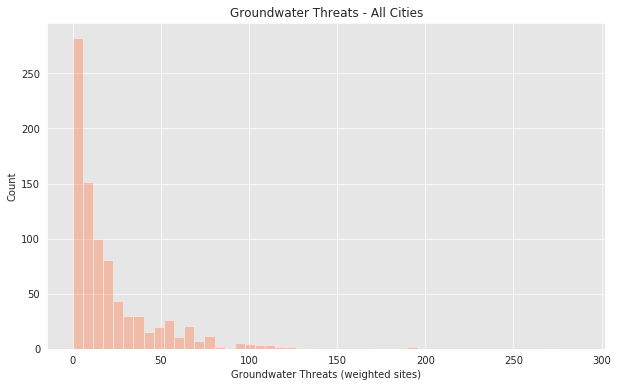

In [44]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Groundwater_Threats'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Groundwater Threats (weighted sites)', ylabel='Count')
ax.set_title("Groundwater Threats - All Cities");

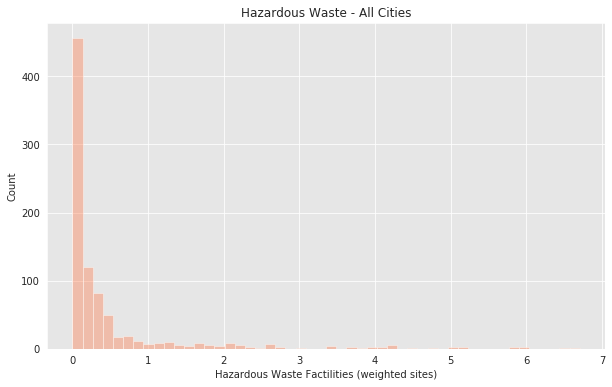

In [45]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Hazardous_Waste'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Hazardous Waste Factilities (weighted sites)', ylabel='Count')
ax.set_title("Hazardous Waste - All Cities");

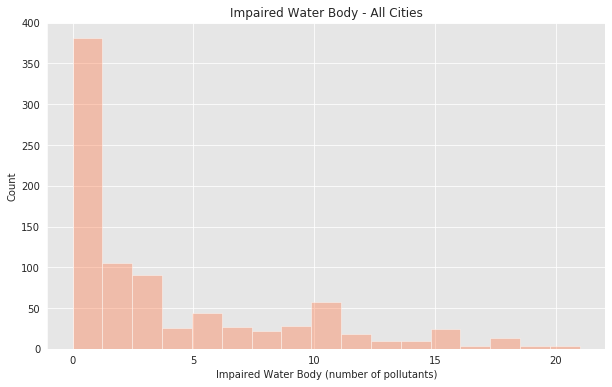

In [46]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Impaired_Water_Body'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Impaired Water Body (number of pollutants)', ylabel='Count')
ax.set_title("Impaired Water Body - All Cities");

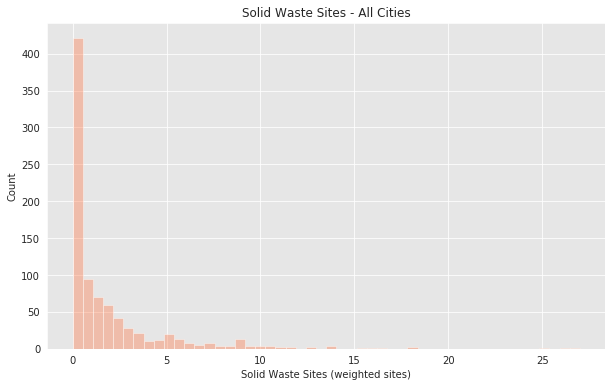

In [47]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Solid_Waste_Sites'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Solid Waste Sites (weighted sites)', ylabel='Count')
ax.set_title("Solid Waste Sites - All Cities");

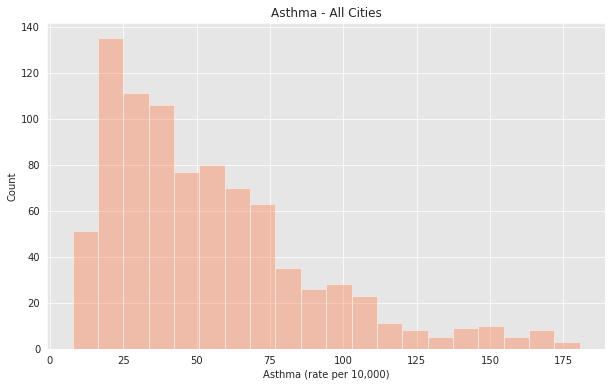

In [48]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Asthma'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Asthma (rate per 10,000)', ylabel='Count')
ax.set_title("Asthma - All Cities");

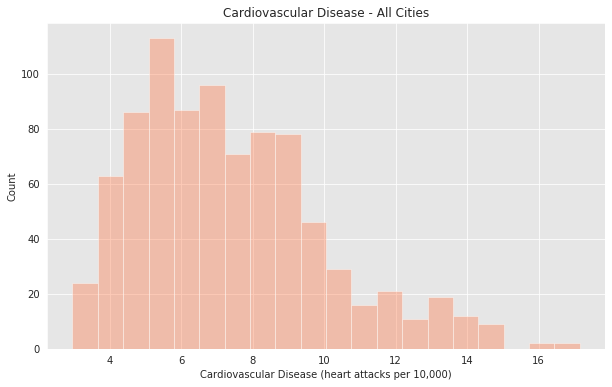

In [49]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Cardiovascular_Disease'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Cardiovascular Disease (heart attacks per 10,000)', ylabel='Count')
ax.set_title("Cardiovascular Disease - All Cities");

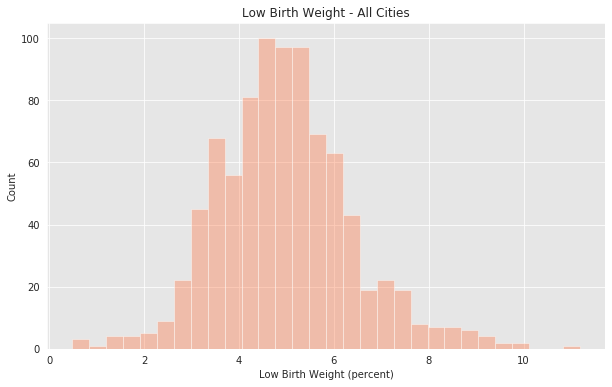

In [50]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Low_Birth_Weight'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Low Birth Weight (percent)', ylabel='Count')
ax.set_title("Low Birth Weight - All Cities");

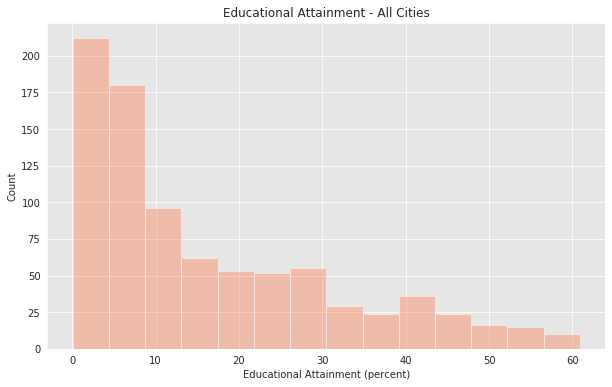

In [51]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Educational_Attainment'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Educational Attainment (percent)', ylabel='Count')
ax.set_title("Educational Attainment - All Cities");

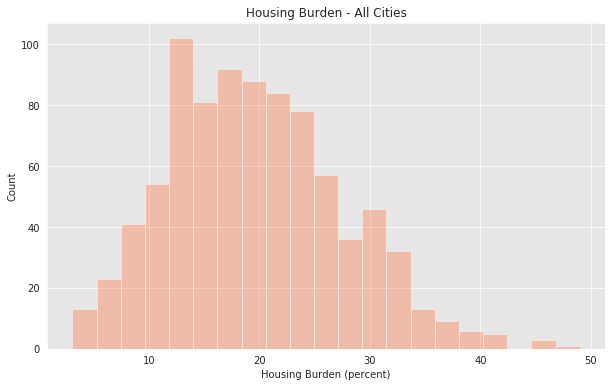

In [52]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Housing_Burden'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Housing Burden (percent)', ylabel='Count')
ax.set_title("Housing Burden - All Cities");

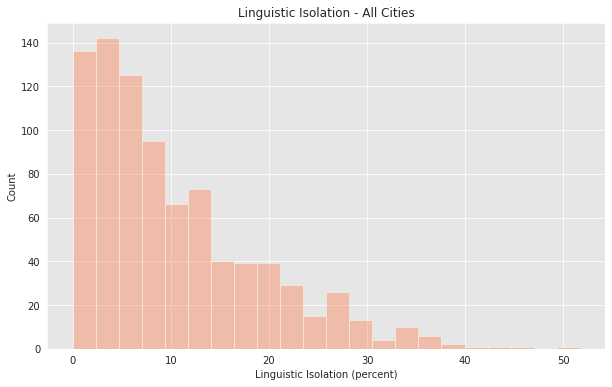

In [53]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Linguistic_Isolation'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Linguistic Isolation (percent)', ylabel='Count')
ax.set_title("Linguistic Isolation - All Cities");

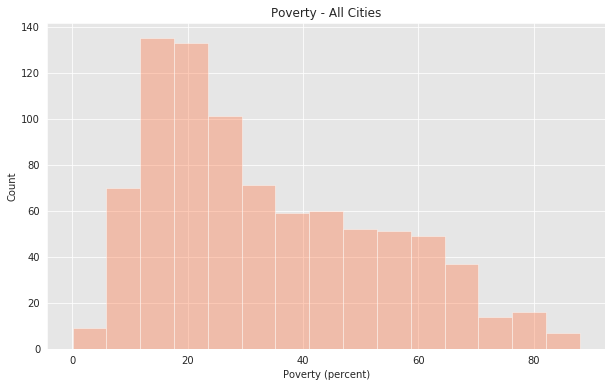

In [54]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Poverty'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Poverty (percent)', ylabel='Count')
ax.set_title("Poverty - All Cities");

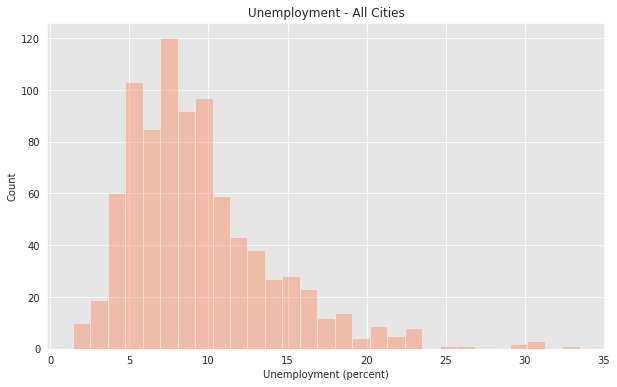

In [55]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['Unemployment'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='Unemployment (percent)', ylabel='Count')
ax.set_title("Unemployment - All Cities");

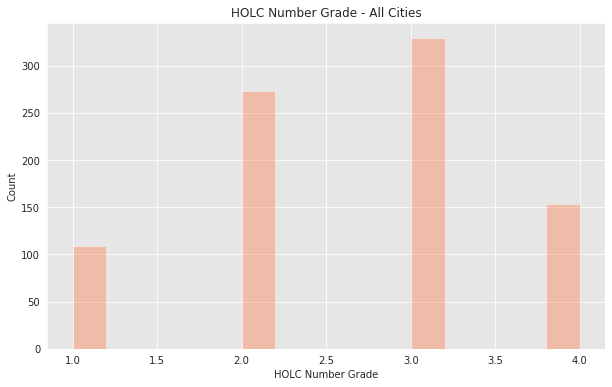

In [56]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df_for_corr['HOLC_Num'],color='coral', kde=False)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlabel='HOLC Number Grade', ylabel='Count')
ax.set_title("HOLC Number Grade - All Cities");

In [57]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.skew.html
# https://en.wikipedia.org/wiki/Skewness
df_for_corr.skew(axis = 0, skipna = True) 

Ozone                     -0.087305
PM_2_5                     0.185008
Diesel_PM                  2.311698
Drinking_Water             0.230461
Pesticide_Use             22.947443
Toxic_Releases            12.086620
Traffic                    1.253567
Cleanup_Sites              3.743862
Groundwater_Threats        3.447878
Hazardous_Waste            3.612298
Impaired_Water_Body        1.330381
Solid_Waste_Sites          3.375968
Asthma                     1.267263
Cardiovascular_Disease     0.850746
Low_Birth_Weight           0.458306
Educational_Attainment     1.060248
Housing_Burden             0.465265
Linguistic_Isolation       1.234814
Poverty                    0.643580
Unemployment               1.427949
HOLC_Num                  -0.125166
dtype: float64

In [57]:
df_for_charts = HOLC_Eight_California_Cities_Final[['Asthma','Cardiovascular_Disease','Low_Birth_Weight','HOLC_Num', 'City']]

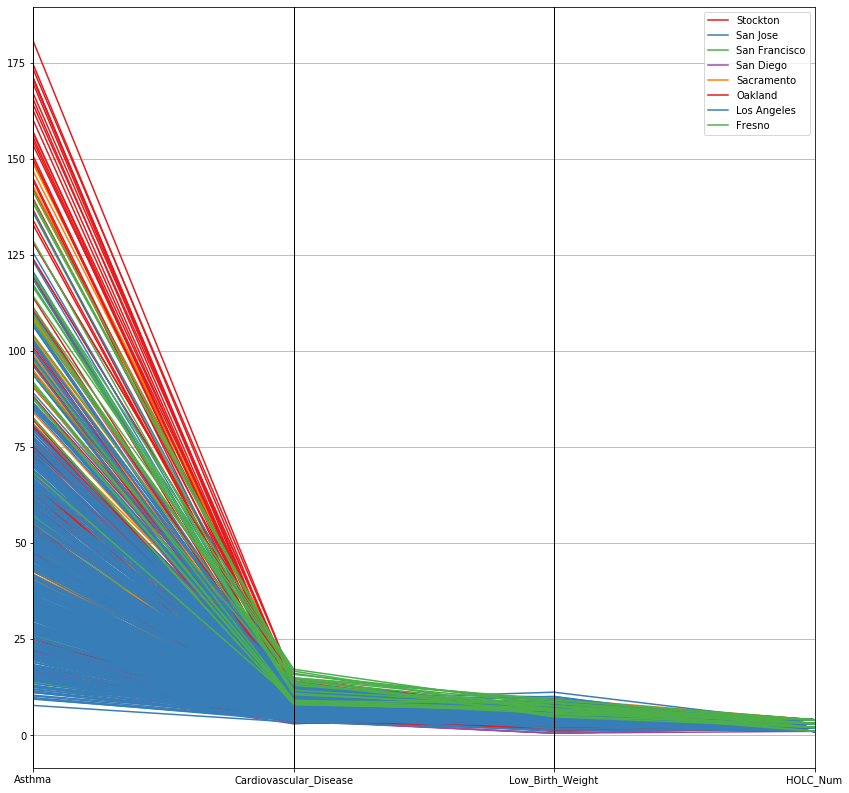

In [58]:
# https://colorbrewer2.org
pd.plotting.parallel_coordinates(df_for_charts, 'City', color=('#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00'));

In [59]:
# from arcgis.mapping import display_colormaps
# display_colormaps()

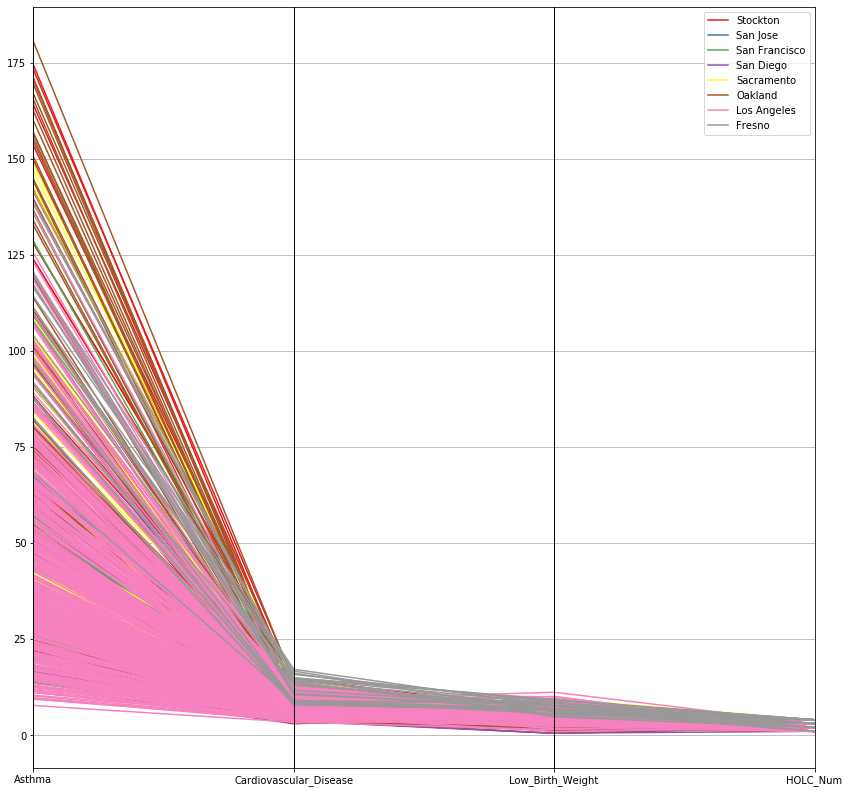

In [73]:
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html
pd.plotting.parallel_coordinates(df_for_charts, class_column='City', colormap="Set1");

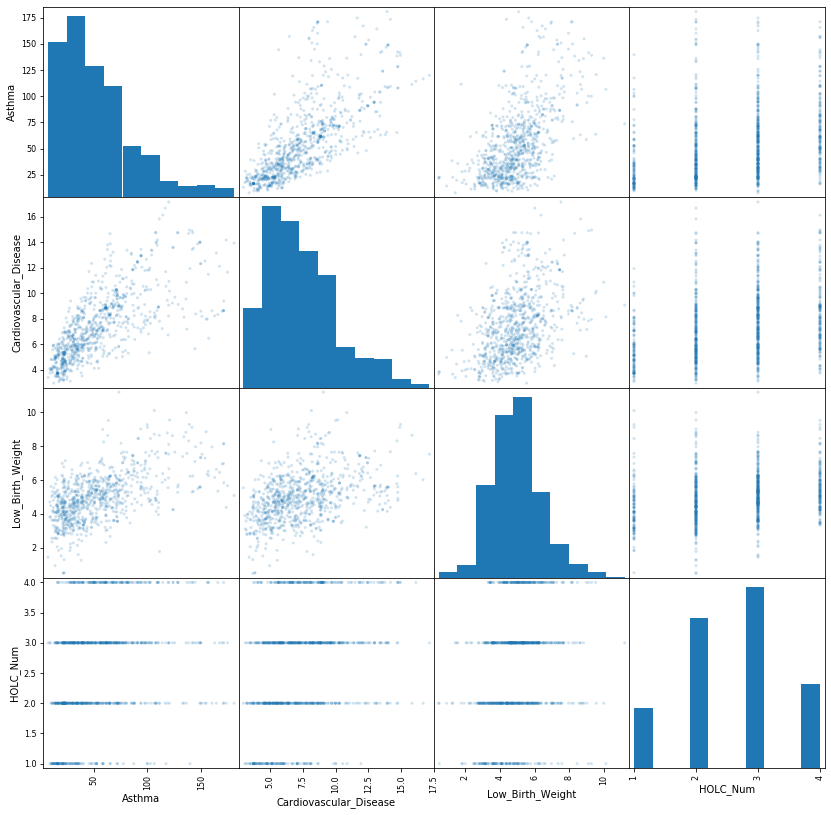

In [61]:
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
pd.plotting.scatter_matrix(df_for_charts, alpha=0.2);

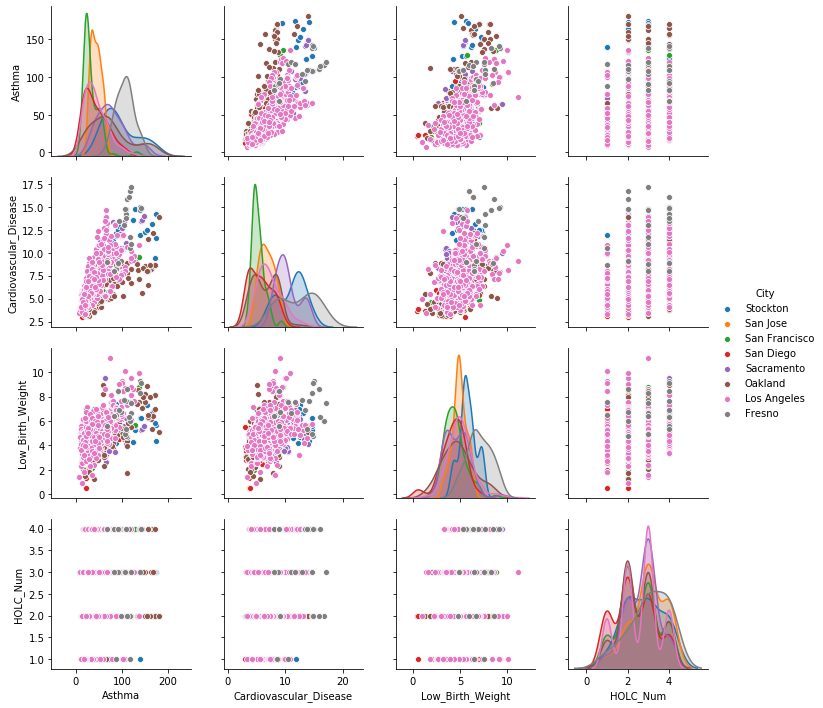

In [62]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot
sns.pairplot(df_for_charts, hue='City');

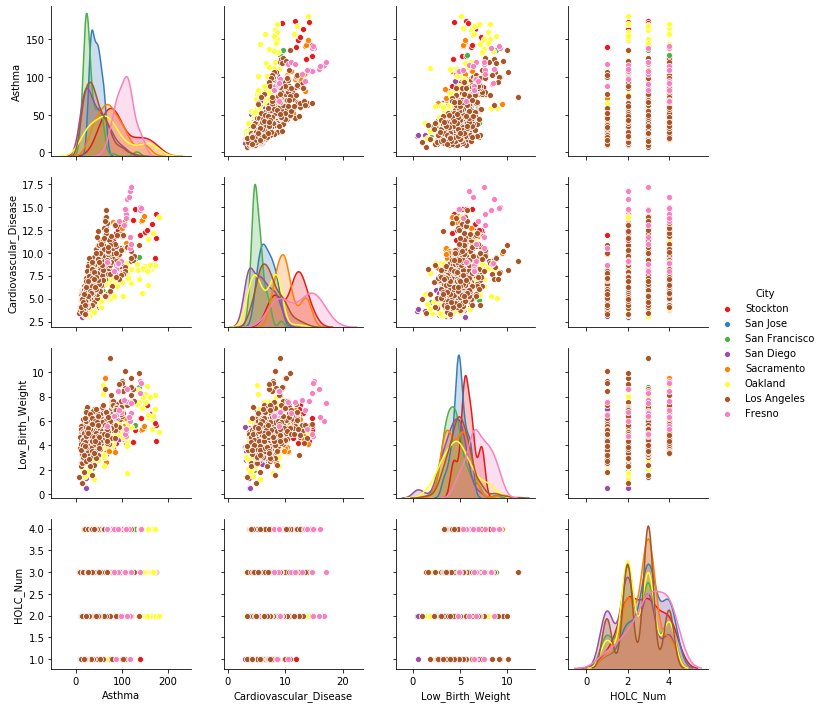

In [63]:
plt.rc('figure', figsize=(14,14))
ax = sns.pairplot(df_for_charts, hue='City', palette="Set1")
plt.show();

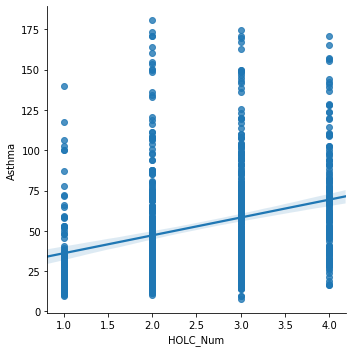

In [64]:
# https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot
sns.lmplot(x="HOLC_Num", y="Asthma", data=df_for_charts);

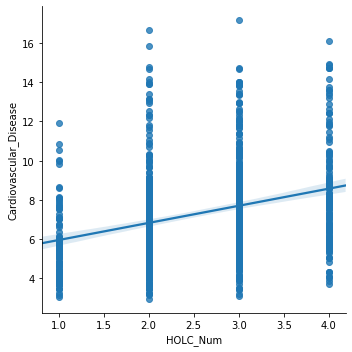

In [65]:
sns.lmplot(x="HOLC_Num", y="Cardiovascular_Disease", data=df_for_charts);

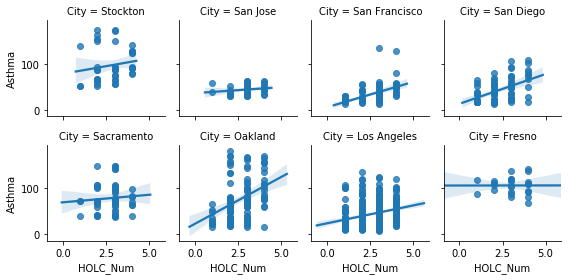

In [78]:
sns.lmplot(x="HOLC_Num", y="Asthma", col="City", data=df_for_charts, col_wrap=4, height=2);

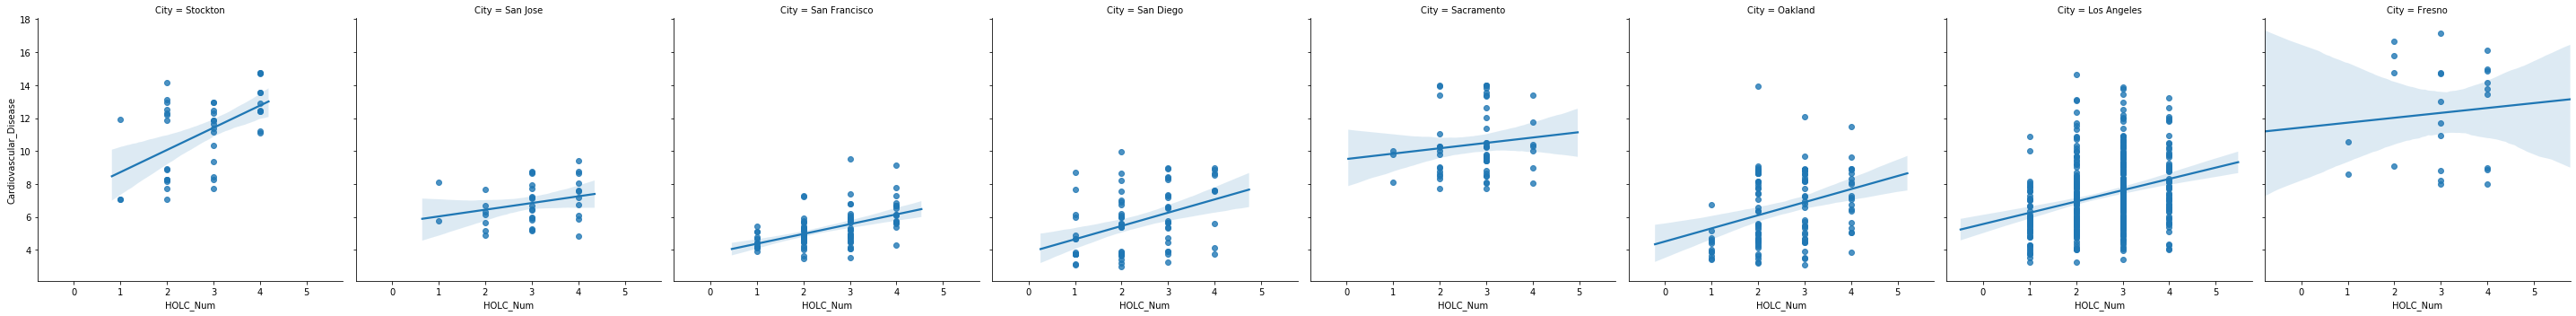

In [79]:
sns.lmplot(x="HOLC_Num", y="Cardiovascular_Disease", col="City", data=df_for_charts);

### 3 - Data Preparation - select data; correct, modify attributes; generate new attributes

In [58]:
sdf = HOLC_Eight_California_Cities_Final

# Rename columns
sdf = sdf.rename(columns = {'OBJECTID':'ID','HOLC_Grade':'HOLC_Letter_Grade','HOLC_Num':'HOLC_Number_Grade'})

# Reorder columns
sdf = sdf[['ID','HOLC_Letter_Grade','HOLC_Number_Grade','City','Ozone','PM_2_5','Diesel_PM','Drinking_Water',
           'Pesticide_Use','Toxic_Releases','Traffic','Cleanup_Sites','Groundwater_Threats','Hazardous_Waste',
           'Impaired_Water_Body','Solid_Waste_Sites','Asthma','Cardiovascular_Disease','Low_Birth_Weight',
           'Educational_Attainment','Housing_Burden','Linguistic_Isolation','Poverty',
           'Unemployment','SHAPE']]

sdf.head()

,ID,HOLC_Letter_Grade,HOLC_Number_Grade,City,Ozone,PM_2_5,Diesel_PM,Drinking_Water,Pesticide_Use,Toxic_Releases,Traffic,Cleanup_Sites,Groundwater_Threats,Hazardous_Waste,Impaired_Water_Body,Solid_Waste_Sites,Asthma,Cardiovascular_Disease,Low_Birth_Weight,Educational_Attainment,Housing_Burden,Linguistic_Isolation,Poverty,Unemployment,SHAPE
0,1,B,2,Stockton,0.045959,13.428119,18.443681,278.513573,0.0,520.246970,1664.121483,0.466459,5.379489,0.018149,18.646472,0.0,68.398669,8.927429,5.772116,23.235441,17.058982,3.980046,45.018736,14.826887,"{'rings': [[[-13504988.399, 4575989.745200001]..."
1,2,B,2,Stockton,0.045896,13.409574,18.418209,278.128928,0.0,544.318141,1944.774559,0.696011,7.206590,0.020436,18.952177,0.0,68.269658,8.841263,5.715489,23.955024,18.620633,2.098613,44.346836,15.339166,"{'rings': [[[-13506368.4685, 4574567.342399999..."
2,3,A,1,Stockton,0.046000,13.440000,18.460000,278.760000,0.0,490.470000,753.250000,0.200000,53.250000,0.120000,18.000000,0.0,52.850000,7.070000,5.410000,5.300000,11.000000,2.800000,33.600000,10.000000,"{'rings': [[[-13504858.736, 4575555.872900002]..."
3,4,A,1,Stockton,0.046000,13.440000,18.460000,278.760000,0.0,490.470000,753.250000,0.200000,53.250000,0.120000,18.000000,0.0,52.850000,7.070000,5.410000,5.300000,11.000000,2.800000,33.600000,10.000000,"{'rings': [[[-13503341.364500001, 4575675.8429..."
4,5,B,2,Stockton,0.046000,13.440000,18.460000,278.760000,0.0,490.470000,753.250000,0.200000,53.250000,0.120000,18.000000,0.0,52.850000,7.070000,5.410000,5.300000,11.000000,2.800000,33.600000,10.000000,"{'rings': [[[-13503627.1151, 4574985.278999999..."


In [59]:
# https://developers.arcgis.com/python/guide/visualizing-data-with-the-spatially-enabled-dataframe/
# https://developers.arcgis.com/python/guide/visualizing-data-with-the-spatial-dataframe/
# https://developers.arcgis.com/python/guide/using-the-map-widget/

m1 = GIS().map("California")
m1.zoom = 8
m1.center = [39,-117]
sdf.spatial.plot(map_widget = m1,
                 renderer_type = 'c',  # for class breaks renderer
                 method = 'esriClassifyNaturalBreaks',  # classification algorithm
                 class_count = 5,  # choose the number of classes
                 col = 'Ozone',  # numeric column to classify
                 cmap = 'Oranges',  # color map to pick colors from for each class
                 alpha = 0.7  # specify opacity
       )

m1.legend = True
#m1.basemap = 'osm'

# Add two layers to the map...
#sdf1.spatial.plot(map_widget = m1, renderer_type = 'u', col = abc)
#sdf2.spatial.plot(map_widget = m1, renderer_type = 'u', col = xyz)

In [60]:
m1

MapView(layout=Layout(height='400px', width='100%'), legend=True)

### 4 - Modeling - choose techniques, tools, algorithms to extract knowledge from data

In [66]:
# Create a feature class from spatial dataframe
sdf.spatial.to_featureclass(r'/arcgis/home/holc/spatial_data/HOLC_Eight_California_Cities_Final.shp')

'/arcgis/home/holc/spatial_data/HOLC_Eight_California_Cities_Final.shp'

In [67]:
# Path to HOLC_Eight_California_Cities_Final data
HOLC_data = '/arcgis/home/holc/spatial_data/HOLC_Eight_California_Cities_Final.shp'

### Hot Spot Analysis

In [68]:
# https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/hot-spot-analysis.htm
# https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/hot-spot-analysis.htm#GUID-962A2207-58C5-4D3A-AD16-A8588AB5692E
HOLC_data_HS = arcpy.stats.HotSpots(HOLC_data,"Ozone",
                                    "{0}//{1}_HotSpots".format(holc_data_ca,"HOLC_Ozone_HS"),
                                    )

In [69]:
for i in range(0, HOLC_data_HS.messageCount):
    print(HOLC_data_HS.getMessage(i))

Start Time: Tuesday, February 02, 2021 4:03:59 AM
WARNING 000853: The default neighborhood search threshold was 8527.2132 Meters.
Succeeded at Tuesday, February 02, 2021 4:04:10 AM (Elapsed Time: 10.73 seconds)


In [70]:
HOLC_data_HS.getOutput(0)

'/arcgis/home/holc/holc_data_ca.gdb/HOLC_Ozone_HS_HotSpots'

In [71]:
sdf2 = pd.DataFrame.spatial.from_featureclass(holc_data_ca + '/HOLC_Ozone_HS_HotSpots')
sdf2.head()

,OBJECTID,SOURCE_ID,Ozone,GiZScore,GiPValue,NNeighbors,Gi_Bin,SHAPE
0,1,0,0.045959,2.320677,0.020304,38,2,"{""rings"": [[[-13504988.399, 4575989.745200001]..."
1,2,1,0.045896,2.376183,0.017493,40,2,"{""rings"": [[[-13506368.4685, 4574567.342399999..."
2,3,2,0.046000,2.429902,0.015103,42,2,"{""rings"": [[[-13504858.736, 4575555.872900002]..."
3,4,3,0.046000,2.456644,0.014024,43,2,"{""rings"": [[[-13503341.364500001, 4575675.8429..."
4,5,4,0.046000,2.456644,0.014024,43,2,"{""rings"": [[[-13503627.1151, 4574985.278999999..."


In [72]:
sdf2.describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,864.0,432.500000,249.559612,1.000000,216.750000,432.500000,648.250000,864.000000
SOURCE_ID,864.0,431.500000,249.559612,0.000000,215.750000,431.500000,647.250000,863.000000
Ozone,864.0,0.042882,0.009085,0.018760,0.033660,0.045975,0.048112,0.065076
GiZScore,864.0,-0.881365,7.141538,-14.831241,-5.379472,2.014272,4.442398,11.397268
GiPValue,864.0,0.072581,0.195265,0.000000,0.000000,0.000002,0.014110,0.970881
NNeighbors,864.0,44.668981,22.299170,2.000000,26.000000,43.000000,61.000000,97.000000
Gi_Bin,864.0,0.490741,2.578080,-3.000000,-3.000000,2.000000,3.000000,3.000000


In [73]:
m2 = GIS().map("California")
m2.zoom = 8
m2.center = [39,-117]
sdf2.spatial.plot(map_widget = m2,
                 renderer_type = 'c',  # for class breaks renderer
                 class_count = 7,  # choose the number of classes
                 col = 'Gi_Bin',  # numeric column to classify
                 cmap = 'bwr',  # color map to pick colors from for each class
                 alpha = 0.7  # specify opacity
       )

m2.legend = True

In [74]:
m2

MapView(layout=Layout(height='400px', width='100%'), legend=True)

### 5 - Evaluation - review analytic output; assess insights; propose improvements

### Optimized Hot Spot Analysis

In [75]:
# https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/optimized-hot-spot-analysis.htm
# https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/optimized-hot-spot-analysis.htm#GUID-60CB0FFF-E09C-448B-AD99-850F640E9489
HOLC_data_OptHS = arcpy.stats.OptimizedHotSpotAnalysis(HOLC_data,
                                                       "{0}//{1}_HotSpots".format(holc_data_ca,"HOLC_Ozone_OptHS"),
                                                       "Ozone")

In [76]:
for i in range(0, HOLC_data_OptHS.messageCount):
    print(HOLC_data_OptHS.getMessage(i))

Start Time: Tuesday, February 02, 2021 4:05:42 AM

************************** Initial Data Assessment ***************************
Making sure there are enough weighted features for analysis....
    - There are 864 valid input features.

Evaluating the Analysis Field values....
    - OZONE Properties:
        Min:       0.0188
        Max:       0.0651
        Mean:      0.0429
        Std. Dev.: 0.0091
Looking for locational outliers....
    - There were 17 outlier locations; these will not be used to compute the optimal fixed distance band.

***************************** Scale of Analysis ******************************
Looking for an optimal scale of analysis by assessing the intensity of clustering at increasing distances....
    - No optimal distance was found using this method.

Determining an optimal distance using the spatial distribution of features....
    - The optimal fixed distance band is based on the average distance to 30 nearest neighbors: 14251.0000 Meters

************

In [77]:
HOLC_data_OptHS.getOutput(0)

'/arcgis/home/holc/holc_data_ca.gdb/HOLC_Ozone_OptHS_HotSpots'

In [78]:
sdf3 = pd.DataFrame.spatial.from_featureclass(holc_data_ca + '/HOLC_Ozone_OptHS_HotSpots')
sdf3.head()

,OBJECTID,SOURCE_ID,Ozone,GiZScore,GiPValue,NNeighbors,Gi_Bin,SHAPE
0,1,0,0.045959,2.456644,0.014024,43,2,"{""rings"": [[[-13504988.399, 4575989.745200001]..."
1,2,1,0.045896,2.456644,0.014024,43,2,"{""rings"": [[[-13506368.4685, 4574567.342399999..."
2,3,2,0.046000,2.456644,0.014024,43,2,"{""rings"": [[[-13504858.736, 4575555.872900002]..."
3,4,3,0.046000,2.456644,0.014024,43,2,"{""rings"": [[[-13503341.364500001, 4575675.8429..."
4,5,4,0.046000,2.456644,0.014024,43,2,"{""rings"": [[[-13503627.1151, 4574985.278999999..."


In [79]:
sdf3.describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,864.0,432.500000,249.559612,1.000000,216.750000,432.500000,648.250000,864.000000
SOURCE_ID,864.0,431.500000,249.559612,0.000000,215.750000,431.500000,647.250000,863.000000
Ozone,864.0,0.042882,0.009085,0.018760,0.033660,0.045975,0.048112,0.065076
GiZScore,864.0,-0.589540,9.034698,-16.554576,-6.394792,2.456644,7.041827,11.397268
GiPValue,864.0,0.047157,0.166377,0.000000,0.000000,0.000000,0.000274,0.976190
NNeighbors,864.0,77.615741,37.696975,2.000000,44.000000,79.500000,102.250000,158.000000
Gi_Bin,864.0,0.574074,2.682344,-3.000000,-3.000000,2.000000,3.000000,3.000000


In [80]:
m3 = GIS().map("California")
m3.zoom = 8
m3.center = [39,-117]
sdf3.spatial.plot(map_widget = m3,
                 renderer_type = 'c',  # for class breaks renderer
                 class_count = 7,  # choose the number of classes
                 col = 'Gi_Bin',  # numeric column to classify
                 cmap = 'bwr',  # color map to pick colors from for each class
                 alpha = 0.7  # specify opacity
       )

m3.legend = True

In [81]:
m3

MapView(layout=Layout(height='400px', width='100%'), legend=True)

### 6 - Deployment - share to aid in problem resolution or decision making

In [32]:
import time
current_date_time = time.strftime("%Y%m%d-%H%M%S")
layer_name = 'HOLC_Ozone_OptHS_HotSpots_'+ str(current_date_time)

In [33]:
item = gis.content.import_data(sdf3, title = layer_name, tags = "GIS")
item

<Item title:"HOLC_Ozone_OptHS_HotSpots_20210127-001226" type:Feature Layer Collection owner:bnhilton>

#### Link to map
https://arcg.is/vCj8H

### Python Developer Resources

https://developers.arcgis.com/python/guide/

https://developers.arcgis.com/python/sample-notebooks/

https://developers.arcgis.com/python/api-reference/index.html

https://pro.arcgis.com/en/pro-app/latest/arcpy/main/arcgis-pro-arcpy-reference.htm